### Mutiple Linear Regression (MLA)

Loading the Housing dataset into a data frame

Attributes:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s


In [2]:
import pandas as pd
import warnings

df = pd.read_fwf("./housing.data.txt")


df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

#### Exploratory Data Analysis (EDA)
Visualizing the important characteristics of the dataset

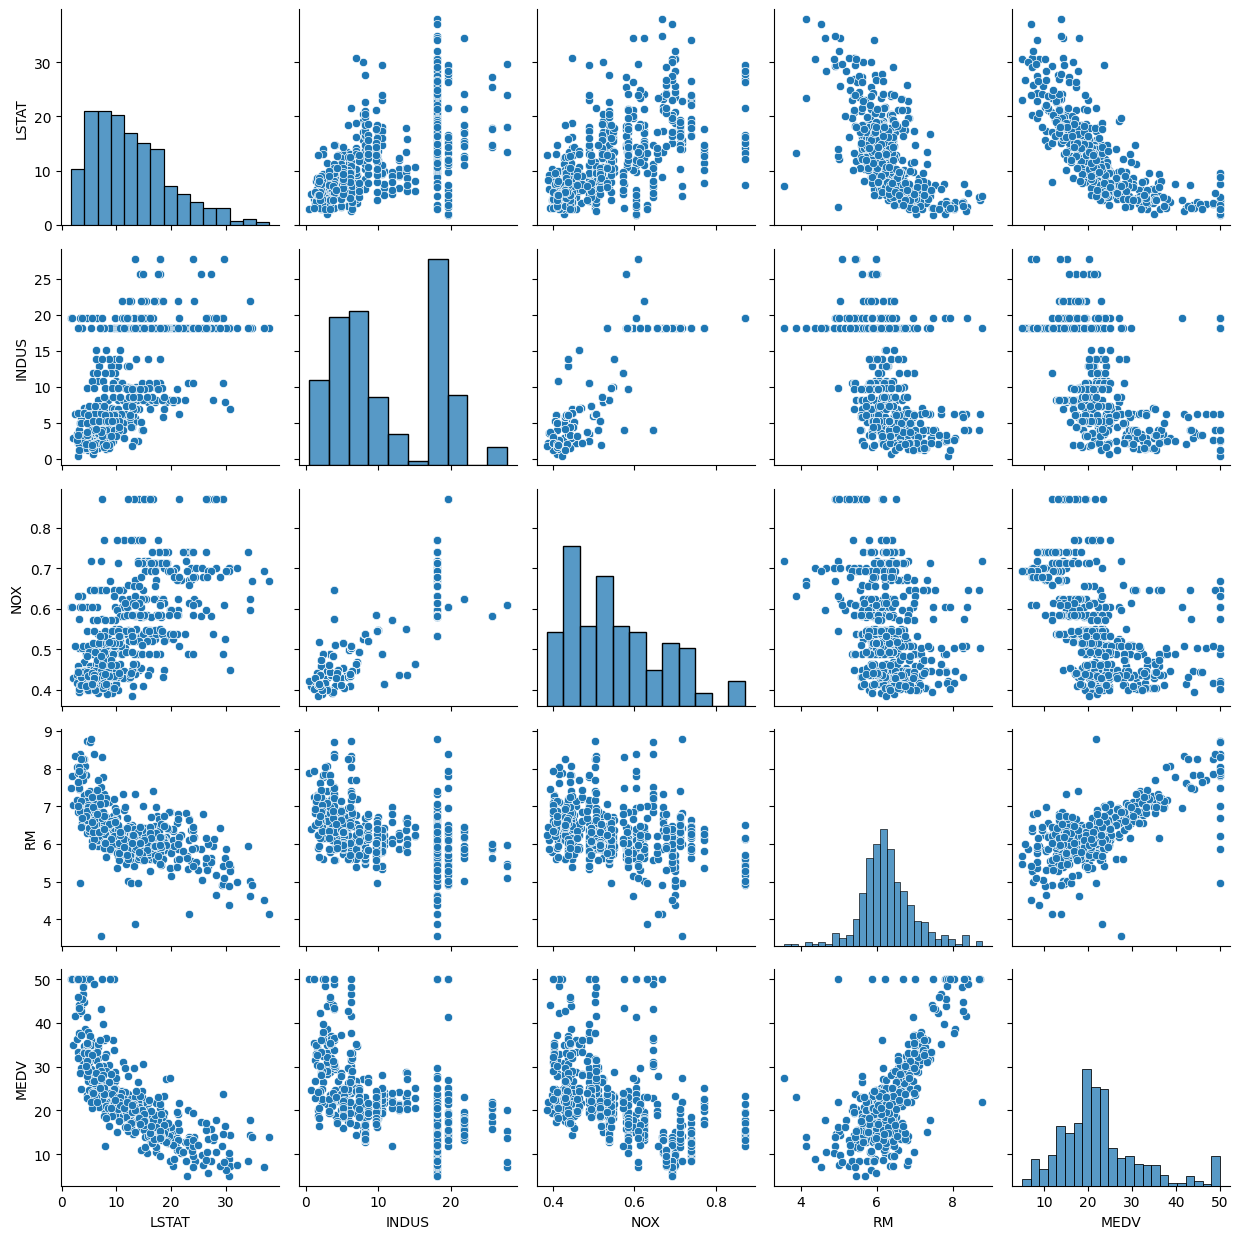

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()


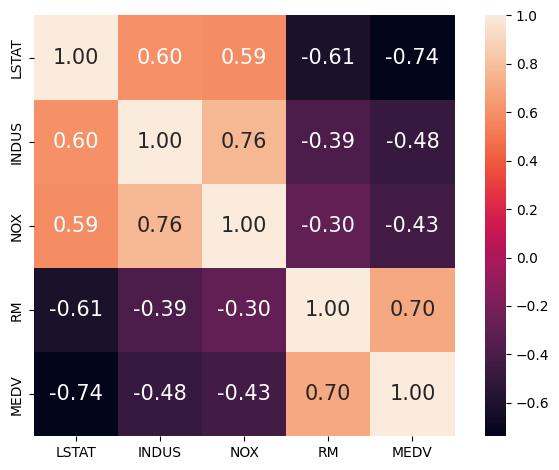

In [9]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

#### Implementing a simple linear regression model (SLR)

Solving regression for regression parameters with gradient descent

In [10]:
# Defining the model:

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [29]:
# Separating target and attribute
X = df[['RM']].values 
y = df['MEDV'].values

# Splitting train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=0)

# It's importand to standardize/normalize dataset before applying ML models 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Fitting the model to dataset
lr = LinearRegressionGD()
lr.fit(X_train_std, y_train)

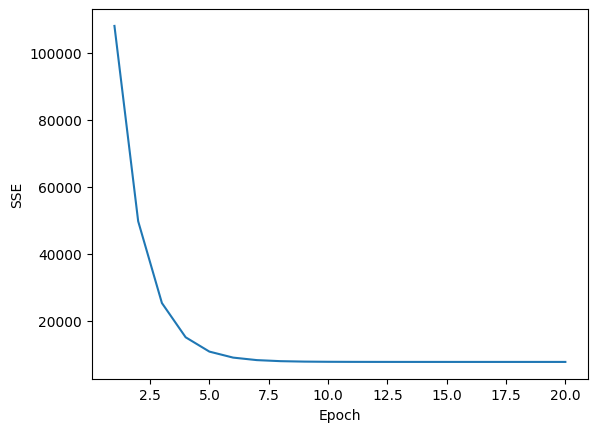

In [12]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [13]:
# Let's visualize model fitting 

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

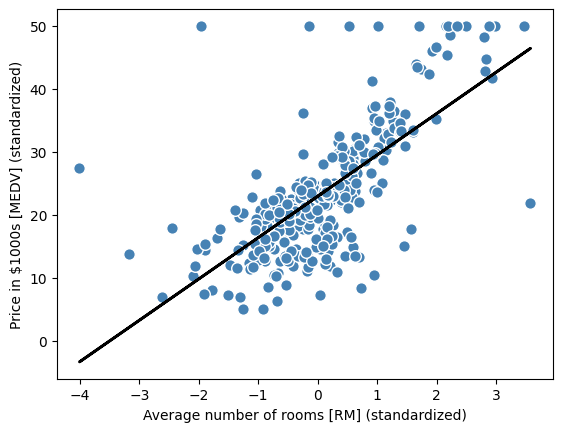

In [14]:
lin_regplot(X_train_std, y_train, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [15]:
# Print the estimated parameters
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 6.569
Intercept: 22.930


In [16]:
# Prediction on the test set
y_pred_test = lr.predict(X_test)

y_pred_test

array([65.00496599, 74.3001708 , 63.55977514, 70.49669124, 65.00496599,
       61.9175128 , 63.08680358, 62.25910337, 63.98676334, 63.19190837,
       63.34299651, 63.05395834, 61.52993889, 68.59166693, 59.53294789,
       69.18288137, 58.58043574, 74.66146852, 63.34299651, 62.12115333,
       58.03520464, 53.4894225 , 63.71743232, 63.84881331, 60.93872445,
       59.26361687, 63.27730601, 66.60781403, 75.93586409, 71.26527001,
       56.01193745, 60.57742674, 62.25253432, 63.13278693, 64.48601109,
       61.05039829, 66.06915198, 65.79325191, 61.81897706, 70.08284113,
       65.14291603, 62.54157249, 59.82855511, 80.24516045, 63.26416792,
       70.12882447, 61.66131988, 61.58249128, 63.02111309, 63.24446077,
       48.30644257, 61.55621509, 63.4218251 , 63.19847742, 61.17521023,
       62.00947949, 60.4132005 , 61.41826505, 55.53239684, 74.97678288,
       61.51680079, 67.67856907, 62.67952252, 67.81651911, 70.46384599,
       63.05395834, 62.40362245, 67.94133104, 65.37283275, 64.17

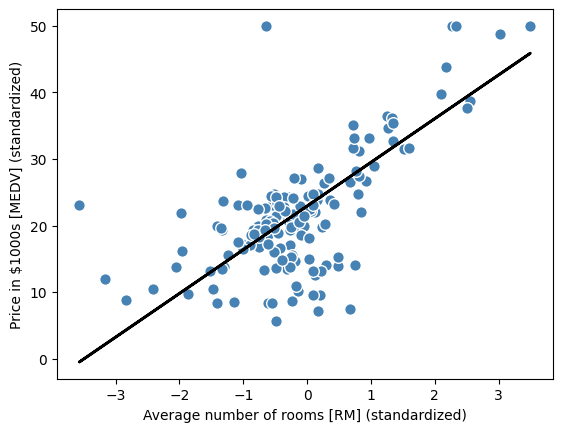

In [17]:
# Visualize prediction
lin_regplot(X_test_std, y_test, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [18]:
# Evaluation 
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
print ('R2 = ', r2_score(y_test, y_pred_test))
print ('RMSE = ', mean_squared_error(y_test, y_pred_test, squared=False))

R2 =  -22.08447609782267
RMSE =  42.62607161391189


c:\Users\pikak\CS\Courses\DS3000\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Using scikit learn linear regression function

In [19]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train_std, y_train)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 6.570
Intercept: 22.934


In [20]:
# Prediction:
y_pred_test = lr.predict(X_test)
print ('R2 = ', r2_score(y_test, y_pred_test))
print ('RMSE = ', mean_squared_error(y_test, y_pred_test, squared=False))

R2 =  -22.08447609782267
RMSE =  42.62607161391189


c:\Users\pikak\CS\Courses\DS3000\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Multiple Linear Regression 

Now we use all attributes to predict the MEDV

In [21]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=0)
# Standardize data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Mlr = LinearRegression()
Mlr.fit(X_train_std, y_train)
# Prediction:
y_test_pred = Mlr.predict(X_test_std)

In [1]:
# Evaluation 

print ('R2 = ', r2_score(y_test, y_test_pred))
print ('RMSE = ', mean_squared_error(y_test, y_test_pred, squared=False))

NameError: name 'r2_score' is not defined